In [1]:
#importing the libraries for KNN method
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [2]:
#Reading the csv file
data =pd.read_csv(r"C:/Users/Dell/Desktop/ML-MINOR-AUG/pima.csv")

In [3]:
#Displaying the head
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Checking the rows and columns
data.shape

(768, 9)

In [5]:
#checking for null values
data.isnull().values.any()


False

In [6]:
#Checking the values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#Replacing zero values in the datasets with mean of the datasets
replacing_zeroes = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI',]
for column in replacing_zeroes:
    data[column]=data[column].replace(0,np.NaN)
    mean=int(data[column].mean(skipna=True))
    data[column]=data[column].replace(np.NaN,mean)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,155.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,155.0,30.1,0.349,47,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002463DEEF488>]],
      dtype=object)

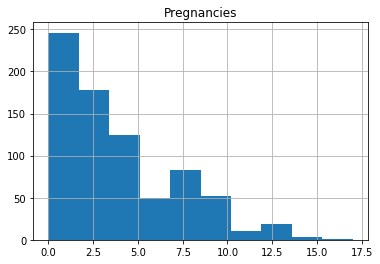

In [8]:
#Displaying the histogram for "Pregnancies" feature
data.hist(column='Pregnancies')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002463E6A0788>]],
      dtype=object)

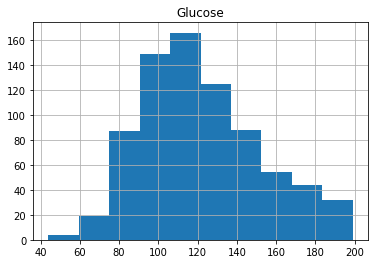

In [9]:
#Displaying the histogram for "Glucose" feature
data.hist(column='Glucose')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002463E772148>]],
      dtype=object)

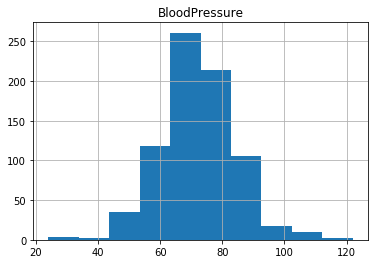

In [10]:
#Displaying the histogram for "BloodPressure" feature
data.hist(column='BloodPressure')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002463E7C35C8>]],
      dtype=object)

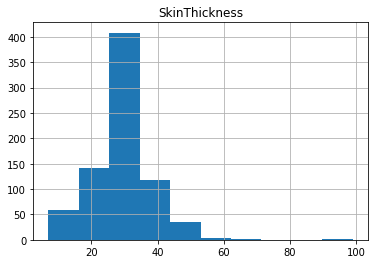

In [11]:
#Displaying the histogram for "SkinThickness" feature
data.hist(column='SkinThickness')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002463E86DD88>]],
      dtype=object)

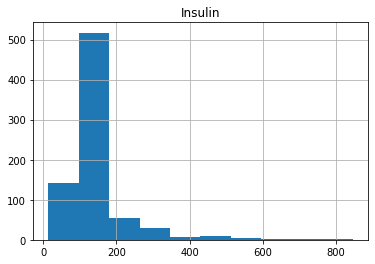

In [12]:
#Displaying the histogram for "Insulin" feature
data.hist(column='Insulin')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002463E8E6388>]],
      dtype=object)

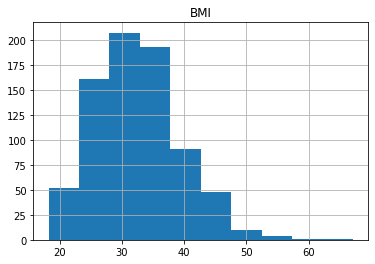

In [13]:
#Displaying the histogram for "BMI" feature
data.hist(column='BMI')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002463E8FF9C8>]],
      dtype=object)

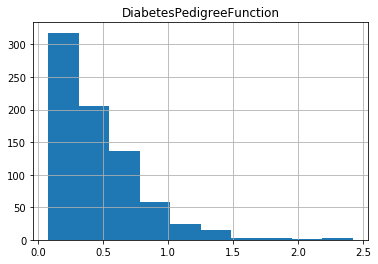

In [14]:
#Displaying the histogram for "DiabetesPedigreeFunction" feature
data.hist(column='DiabetesPedigreeFunction')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002463EA0FB08>]],
      dtype=object)

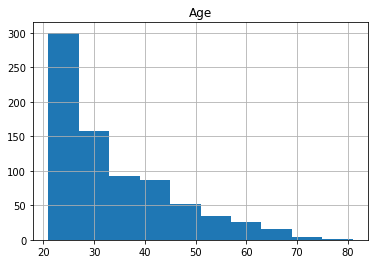

In [15]:
#Displaying the histogram for "Age" feature
data.hist(column='Age')

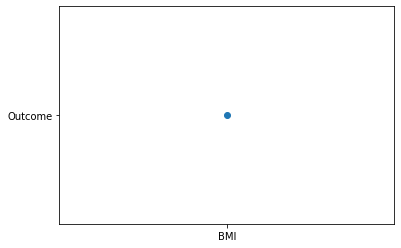

In [16]:
#Plotting BMI VS OUTCOME
plt.scatter('BMI','Outcome')

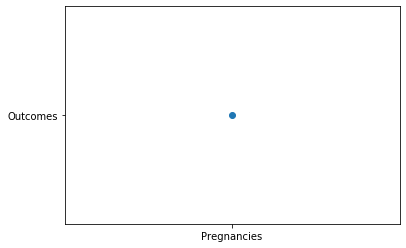

In [17]:
#Plotting Pregnancies VS Outcome
plt.scatter('Pregnancies','Outcomes')

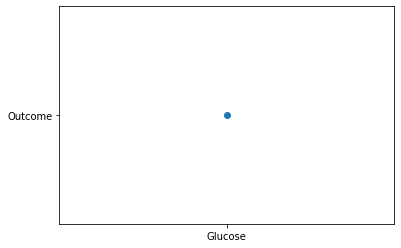

In [18]:
plt.scatter('Glucose','Outcome')

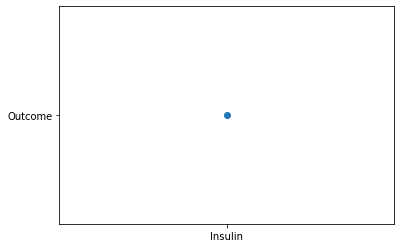

In [19]:
plt.scatter('Insulin','Outcome')

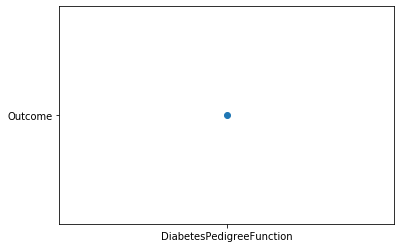

In [20]:
plt.scatter('DiabetesPedigreeFunction','Outcome')

In [21]:
#Splitting the data into two sets: Train and Test
x=data.iloc[:,0:8]
y=data.iloc[0:,8]
x_train, x_test, y_train, y_test= train_test_split(x,y,random_state=0, test_size=0.2)

In [22]:
#Using StandardScaler function to get uniform inputs throughout
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)

In [23]:
import math
math.sqrt(len(y_test))

12.409673645990857

In [24]:
#Classifying the KNN algorithm 
classifier = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [25]:
#Training the model
y_predict= classifier.predict(x_test)

In [26]:
#Predicting outcomes...
c=confusion_matrix=(y_test,y_predict)
print(c)

(661    1
122    0
113    0
14     1
529    0
      ..
476    1
482    0
230    1
527    0
380    0
Name: Outcome, Length: 154, dtype: int64, array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64))


In [27]:
#Printing f1_score
print(f1_score(y_test,y_predict))

0.6590909090909092


In [28]:
#Printing accuracy score
print(accuracy_score(y_test,y_predict))

0.8051948051948052


In [29]:
#Decision Tree Classifier
xt=data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
yt=data['Outcome']

In [30]:
#Splitting the data for training and testing
xt_train, xt_test, yt_train, yt_test= train_test_split(xt,yt,test_size=0.2,random_state=1)


In [31]:
#Classifying the Decision tree classifier
clf=DecisionTreeClassifier()
clf=clf.fit(xt_train,yt_train)
yt_predict=clf.predict(xt_test)

In [32]:
#Printing predicted outcomes
ct=confusion_matrix=(yt_test,yt_predict)
print(ct)

(285    0
101    0
581    0
352    0
726    0
      ..
563    0
318    0
154    1
684    0
643    0
Name: Outcome, Length: 154, dtype: int64, array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64))


In [33]:
#Printing accuracy_score
print(accuracy_score(yt_test,yt_predict))

0.7077922077922078


In [34]:
#Printing f1_score
print(f1_score(yt_test,yt_predict))

0.5871559633027522


In [35]:
# Attempting tuning to increase the accuracy in Decision tree classifier
#In first attempt I am assuming that 'SkinThickness' feature  might be negligently contributing to the 'Outcome' 
#All the other Features seems pretty revelent for the 'Outcome' so will consider those
#--------------------------------------------------------------------

In [36]:
xt1=data[['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']]
yt1=data['Outcome']


In [37]:
xt1_train, xt1_test, yt1_train, yt1_test= train_test_split(xt1,yt1,test_size=0.2,random_state=1)

In [38]:
clf1=DecisionTreeClassifier()
clf1=clf1.fit(xt1_train,yt1_train)
yt1_predict=clf1.predict(xt1_test)

In [39]:
ct1=confusion_matrix=(yt1_test,yt1_predict)
print(ct1)

(285    0
101    0
581    0
352    0
726    0
      ..
563    0
318    0
154    1
684    0
643    0
Name: Outcome, Length: 154, dtype: int64, array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64))


In [40]:
print(accuracy_score(yt1_test,yt1_predict))

0.7077922077922078


In [41]:
print(f1_score(yt1_test,yt1_predict))

0.5794392523364486
